# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

Descriptive Statistics:
Diet 1: Mean = 2.54 kg, Variance = 0.11
Diet 2: Mean = 3.03 kg, Variance = 0.02

Hypotheses:
H₀: μ₁ = μ₂ (No difference in average weight loss between diets)
H₁: μ₁ ≠ μ₂ (Significant difference in average weight loss between diets)

Diet 1 Shapiro-Wilk p-value: 0.9635
Normality assumption satisfied

Diet 2 Shapiro-Wilk p-value: 0.5905
Normality assumption satisfied

Levene's test p-value: 0.1577
Equal variances assumed

Independent t-test results:
t-statistic = -3.5383, p-value = 0.0041

Conclusion: Reject H₀ - Significant difference in weight loss (p < 0.05)


/tmp/ipykernel_4355/760413616.py:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([diet1, diet2], labels=['Diet 1', 'Diet 2'], patch_artist=True)


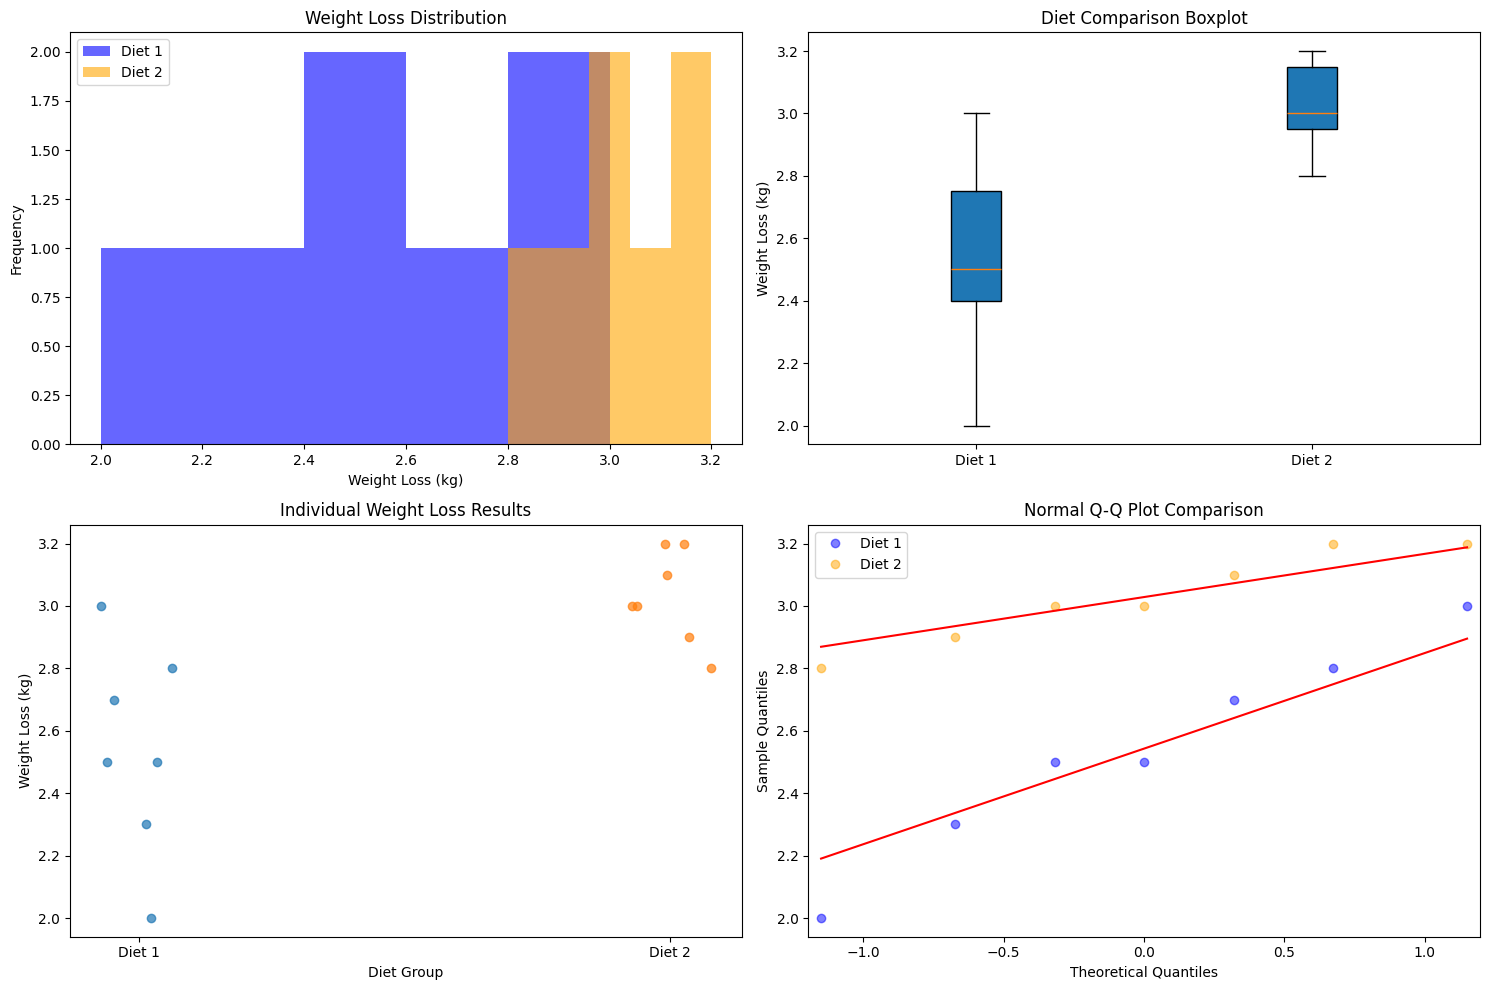

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Raw data input using list comprehensions
diet1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

# Manual statistical calculations using loops
def calculate_stats(data):
    total = count = 0.0
    for x in data:
        total += x
        count += 1
    mean = total / count
    
    squared_diff = 0.0
    for x in data:
        squared_diff += (x - mean)**2
    variance = squared_diff / (count - 1)
    
    return mean, variance, np.sqrt(variance)

# Statistics for both diets using loops
stats1 = calculate_stats(diet1)
stats2 = calculate_stats(diet2)

print("Descriptive Statistics:")
print(f"Diet 1: Mean = {stats1[0]:.2f} kg, Variance = {stats1[1]:.2f}")
print(f"Diet 2: Mean = {stats2[0]:.2f} kg, Variance = {stats2[1]:.2f}")

# Hypothesis formulation
print("\nHypotheses:")
print("H₀: μ₁ = μ₂ (No difference in average weight loss between diets)")
print("H₁: μ₁ ≠ μ₂ (Significant difference in average weight loss between diets)")

# Statistical tests
alpha = 0.05

''' Normality check with Shapiro-Wilk Test - (A p-value greater than 0.05 suggests the data 
is normally distributed, while a p-value less than or equal to 0.05 suggests the data deviates 
significantly from a normal distribution.)'''

normal_results = {}
for i, data in enumerate([diet1, diet2], 1):
    stat, p = stats.shapiro(data)
    normal_results[f'Diet {i}'] = p
    print(f"\nDiet {i} Shapiro-Wilk p-value: {p:.4f}")
    print("Normality assumption satisfied" if p > alpha else "Normality assumption violated")

# Variance homogeneity check
levene_stat, levene_p = stats.levene(diet1, diet2)
equal_var = levene_p > alpha
print(f"\nLevene's test p-value: {levene_p:.4f}")
print(f"Equal variances {'assumed' if equal_var else 'not assumed'}")

# T-test execution with conditional variance handling
t_stat, p_value = stats.ttest_ind(diet1, diet2, equal_var=equal_var)
print(f"\nIndependent t-test results:")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Conclusion with conditional logic
if p_value < alpha:
    print("\nConclusion: Reject H₀ - Significant difference in weight loss (p < 0.05)")
else:
    print("\nConclusion: Fail to reject H₀ - No significant difference (p ≥ 0.05)")

# Visualization
plt.figure(figsize=(15, 10))

# Histogram
plt.subplot(2, 2, 1)
for i, (data, color) in enumerate(zip([diet1, diet2], ['blue', 'orange'])):
    plt.hist(data, bins=5, alpha=0.6, color=color, label=f'Diet {i+1}')
plt.title('Weight Loss Distribution')
plt.xlabel('Weight Loss (kg)')
plt.ylabel('Frequency')
plt.legend()

# Boxplot
plt.subplot(2, 2, 2)
plt.boxplot([diet1, diet2], labels=['Diet 1', 'Diet 2'], patch_artist=True)
plt.title('Diet Comparison Boxplot')
plt.ylabel('Weight Loss (kg)')

# Scatter plot w/ jitter
plt.subplot(2, 2, 3)
for i, data in enumerate([diet1, diet2]):
    jitter = np.random.normal(0, 0.05, len(data))
    plt.scatter(np.full(len(data), i+1) + jitter, data, alpha=0.7)
plt.xticks([1, 2], ['Diet 1', 'Diet 2'])
plt.title('Individual Weight Loss Results')
plt.xlabel('Diet Group')
plt.ylabel('Weight Loss (kg)')

# Q-Q plots
plt.subplot(2, 2, 4)
sm.qqplot(np.array(diet1), line='s', ax=plt.gca(), markerfacecolor='blue', 
          markeredgecolor='blue', alpha=0.5, label='Diet 1')
sm.qqplot(np.array(diet2), line='s', ax=plt.gca(), markerfacecolor='orange', 
          markeredgecolor='orange', alpha=0.5, label='Diet 2')
plt.title('Normal Q-Q Plot Comparison')
plt.legend()

plt.tight_layout()
plt.show()


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

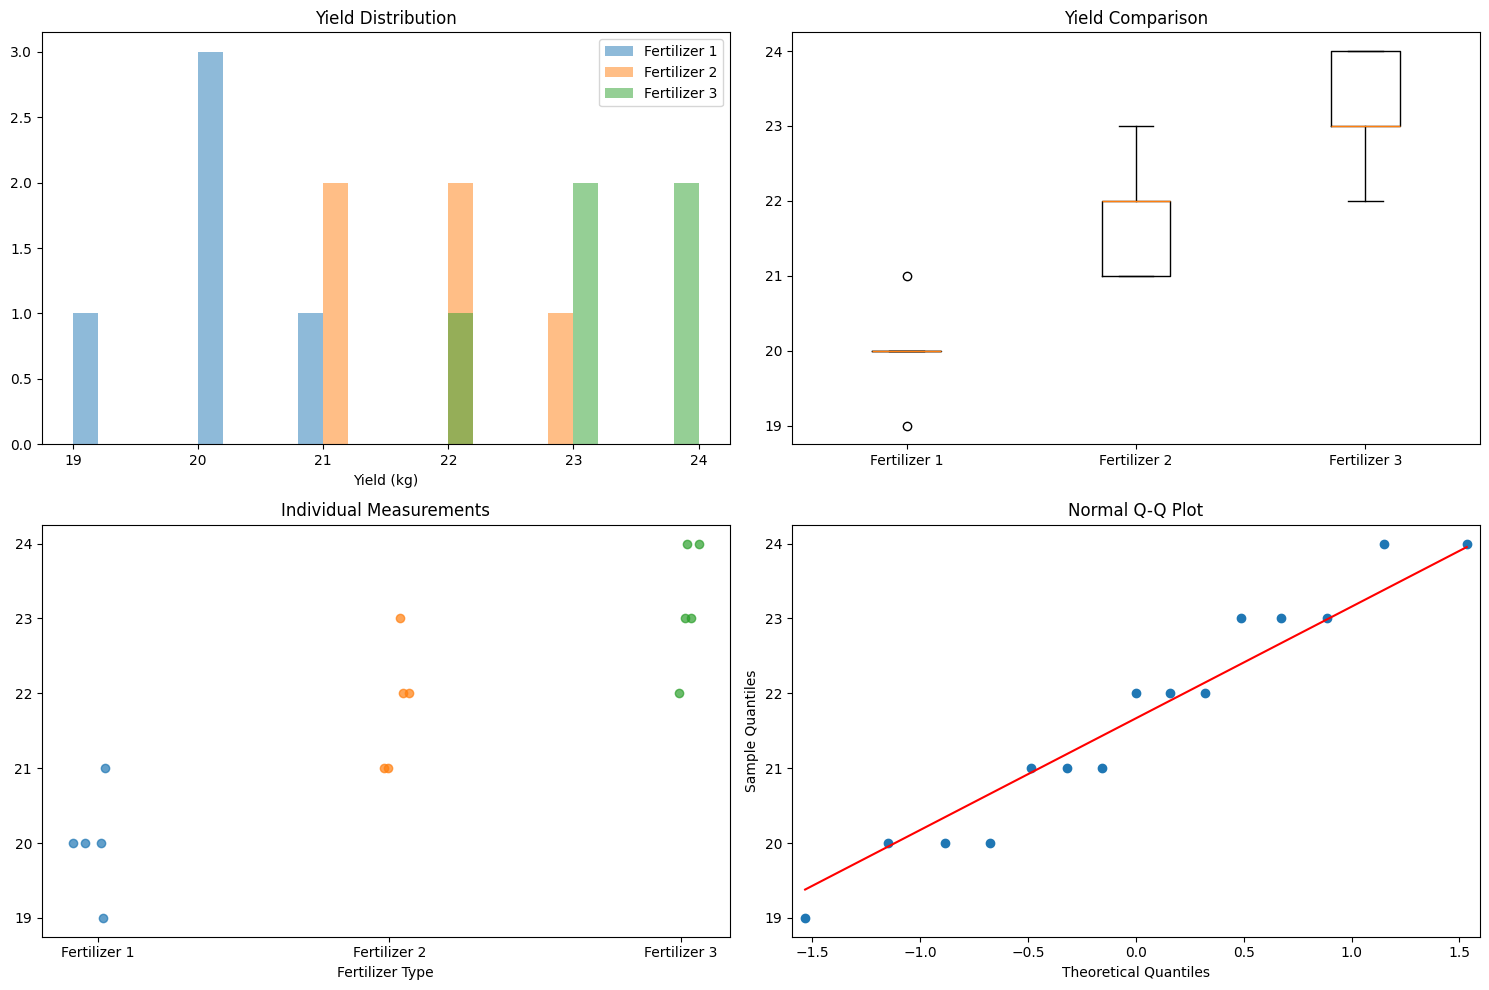

ANOVA Results:
F-statistic: 20.3158
P-value: 0.0001

Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower  upper  reject
--------------------------------------------------------------
Fertilizer 1 Fertilizer 2      1.8 0.0099 0.4572 3.1428   True
Fertilizer 1 Fertilizer 3      3.2 0.0001 1.8572 4.5428   True
Fertilizer 2 Fertilizer 3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------------------


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

try:
    import seaborn as sns
except ImportError:
    sns = None

# Data preparation
data = {
    'Fertilizer 1': [20, 21, 20, 19, 20],
    'Fertilizer 2': [22, 21, 23, 22, 21],
    'Fertilizer 3': [24, 23, 22, 23, 24]
}
df = pd.DataFrame({k: pd.Series(v) for k, v in data.items()})
melted_df = df.melt(var_name='Fertilizer', value_name='Yield')

# Hypothesis testing
groups = [df[col].dropna() for col in df]
f_stat, p_value = f_oneway(*groups)

alpha = 0.05
if p_value < alpha:
    tukey = pairwise_tukeyhsd(melted_df['Yield'], melted_df['Fertilizer'], alpha=alpha)
else:
    tukey = None

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for fert in data:
    plt.hist(data[fert], alpha=0.5, label=fert)
plt.title('Yield Distribution')
plt.xlabel('Yield (kg)')
plt.legend()

plt.subplot(2, 2, 2)
if sns is not None:
    sns.boxplot(x='Fertilizer', y='Yield', data=melted_df)
else:
    plt.boxplot([data[col] for col in data])
    plt.xticks(ticks=[1, 2, 3], labels=data.keys())
plt.title('Yield Comparison')

plt.subplot(2, 2, 3)
for i, fert in enumerate(data):
    plt.plot(np.random.normal(i+1, 0.04, len(data[fert])), data[fert], 'o', alpha=0.7)
plt.xticks([1, 2, 3], data.keys())
plt.title('Individual Measurements')
plt.xlabel('Fertilizer Type')

plt.subplot(2, 2, 4)
sm.qqplot(melted_df['Yield'], line='s', ax=plt.gca())
plt.title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()

# Results display
print(f"ANOVA Results:\nF-statistic: {f_stat:.4f}\nP-value: {p_value:.4f}")
if tukey:
    print("\nTukey HSD Results:")
    print(tukey)

